<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/GabriellJacinto/Hands-On-ML/blob/main/examples%20and%20exercises/Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/GabriellJacinto/Hands-On-ML/blob/main/examples%20and%20exercises/Chapter_4.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

Developed by Gabriel Lima Jacinto

gabriellimajacinto@gmail.com

Date: 2023-12-21

# Examples - Training Models

## Linear Regression

In [28]:
import numpy  as np
x = 2*np.random.rand(100,1)
y = 4 + 3*x + np.random.rand(100,1)

In [34]:
X_b = np.c_[np.ones((100,1)), x]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.51124081],
       [3.0392202 ]])

In [4]:
X_new = np.array([[0],[2]])

In [5]:
X_new_b = np.c_[np.ones((2,1)), X_new]

In [6]:
y_predict = X_new_b.dot(theta_best)

In [7]:
y_predict

array([[ 4.63098598],
       [10.40880224]])

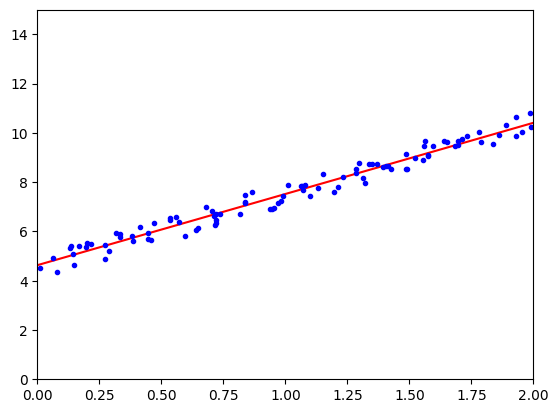

In [8]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.63098598]), array([[2.88890813]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.63098598],
       [10.40880224]])

Least squares

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.63098598],
       [2.88890813]])

Pseudoinverse matrix

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.63098598],
       [2.88890813]])

Gradient Descend step algorithm

In [13]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta*gradients

In [14]:
theta

array([[4.63098598],
       [2.88890813]])

In [15]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0/ (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [16]:
theta

array([[4.62021715],
       [2.8956195 ]])

In [17]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.58899056]), array([2.87670681]))

## Polynomial Regression

In [19]:
m=100
X = 6*np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [21]:
X_poly[0]

array([1.45820821, 2.1263712 ])

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.01019252]), array([[1.01720231, 0.49597877]]))

## Learning Curves

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [24]:
def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [],[]
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

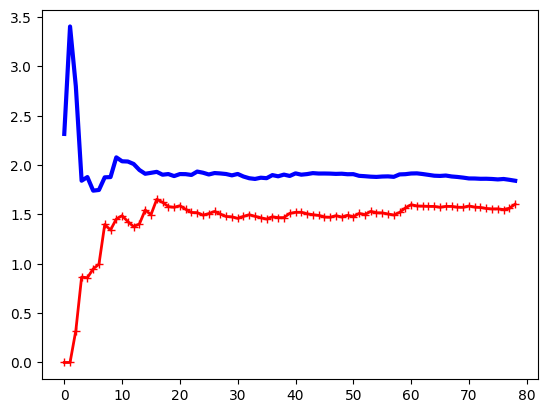

In [25]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [26]:
from sklearn.pipeline import Pipeline

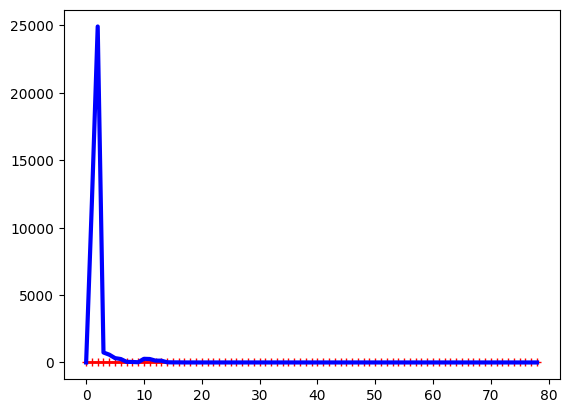

In [27]:
polynomial_regression = Pipeline([
                                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                                ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

## Regularized Models

# Exercises (Page 151)
Solution on https://github.com/ageron/handson-ml2